In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gp
import shapely
import geojson

c=gp.GeoDataFrame.from_file('zip:///home/jovyan/ne_c.zip')
p=gp.GeoDataFrame.from_file('zip:///home/jovyan/ne_pp.zip')

In [211]:
def spatial_rel(r, qq, new_column=None):
    """
    Function that tests relationship r
    on query qq and should be used using
    apply function with axis=1 argument
    on a GeoDataFrame.
    
    It requires shapely library.
    """
    if not new_column:
        new_column=r
    def rel(r, f=r, q=qq):
        s=shape(r.geometry)
        op=getattr(s, f)
        xg=geojson.loads(q.to_json())
        if(len(xg) == 1):
            xg=xg[0]['geometry']
            x=shapely.geometry.shape(xg)
            return getattr(s, f)(x)
        else:
            # When we test multiple geometries
            # we need to test each one separately.
            for g in xg['features']:
                x=shapely.geometry.shape(g['geometry'])
                if op(x) == False:
                    r[new_column]=False
                    return r
            r[new_column]=True
            return r
        r[new_column]=False
        return r
    return rel

def plot_rel(g1, g2):
    """
    Plot relationships between two GeoDataFrames
    with geometries.
    """
    coords = g1.geometry.apply(lambda x: x.representative_point().coords[:])
    g1['coords'] = [crds[0] for crds in coords]

    mp_porto=g1.buffer(0.1)
    gdf_porto=gp.GeoDataFrame(geometry=mp_porto)
    plp=gp.overlay(g2, gdf_porto, how='union')
    plot=plp.plot(cmap='summer', figsize=(100,100), alpha=2)

    for idx, row in g1.iterrows():
        plt.annotate(s=row[0], xy=row['coords'],
            horizontalalignment='center', fontsize=60)
    plt.tight_layout()
    return plot

In [113]:
p[p['ADM0NAME'] == 'Portugal'][['NAME', 'geometry']]

,NAME,geometry
167,Aveiro,POINT (-8.650997534094358 40.64100310524765)
168,Leiria,POINT (-8.804996461868768 39.73899602853049)
169,Viana Do Castelo,POINT (-8.844137484362761 41.69623514266505)
171,Beja,POINT (-7.863002410191882 38.01400214268801)
172,Évora,POINT (-7.905995561304906 38.5599961146537)
173,Portalegre,POINT (-7.423001549366745 39.29000410953336)
174,Santarém,POINT (-8.682002552483425 39.23100008342476)
175,Bragança,POINT (-6.755003425781467 41.80799701416538)
176,Castelo Branco,POINT (-7.487999559095442 39.81099614833136)
177,Guarda,POINT (-7.262000511520284 40.54100414321101)


For each place in Portugal check if its geometry is within Portugal's geometry
and put into a new columns called "within".

In [177]:
places_in_portugal=p[p['ADM0NAME'] == 'Portugal'].apply(spatial_rel('within', c[c['NAME'] == 'Portugal']), axis=1)[['NAME', 'geometry', 'within']]
places_in_portugal

,NAME,geometry,within
167,Aveiro,POINT (-8.650997534094358 40.64100310524765),True
168,Leiria,POINT (-8.804996461868768 39.73899602853049),True
169,Viana Do Castelo,POINT (-8.844137484362761 41.69623514266505),True
171,Beja,POINT (-7.863002410191882 38.01400214268801),True
172,Évora,POINT (-7.905995561304906 38.5599961146537),True
173,Portalegre,POINT (-7.423001549366745 39.29000410953336),True
174,Santarém,POINT (-8.682002552483425 39.23100008342476),True
175,Bragança,POINT (-6.755003425781467 41.80799701416538),True
176,Castelo Branco,POINT (-7.487999559095442 39.81099614833136),True
177,Guarda,POINT (-7.262000511520284 40.54100414321101),True


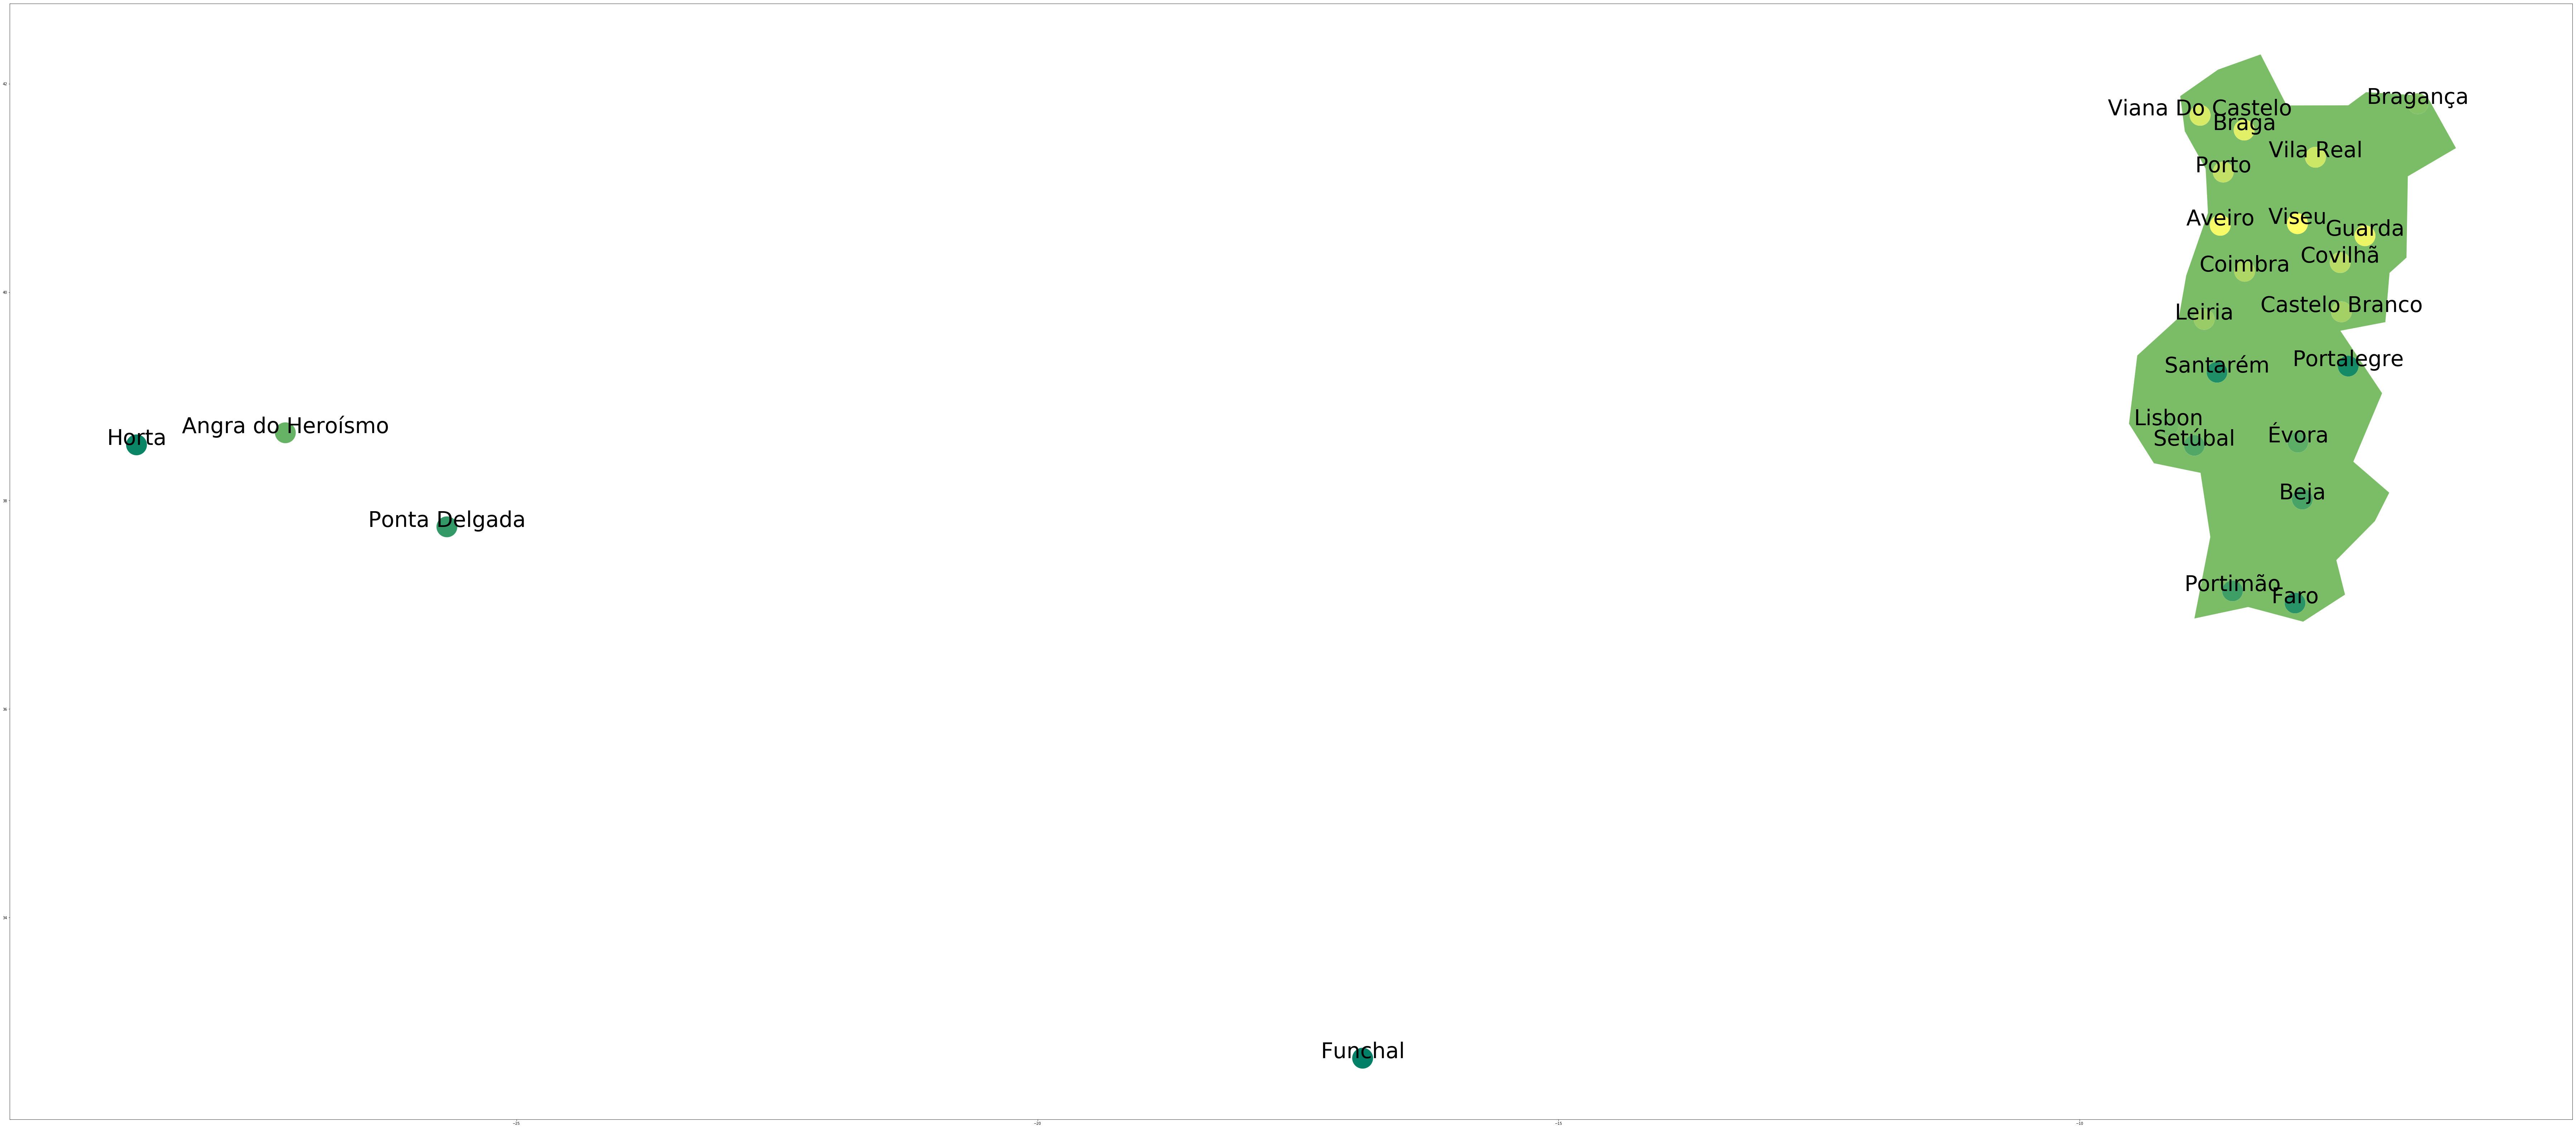

In [180]:
plot_rel(places_in_portugal, c[c['NAME'] == 'Portugal'])

Plot only places within.

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


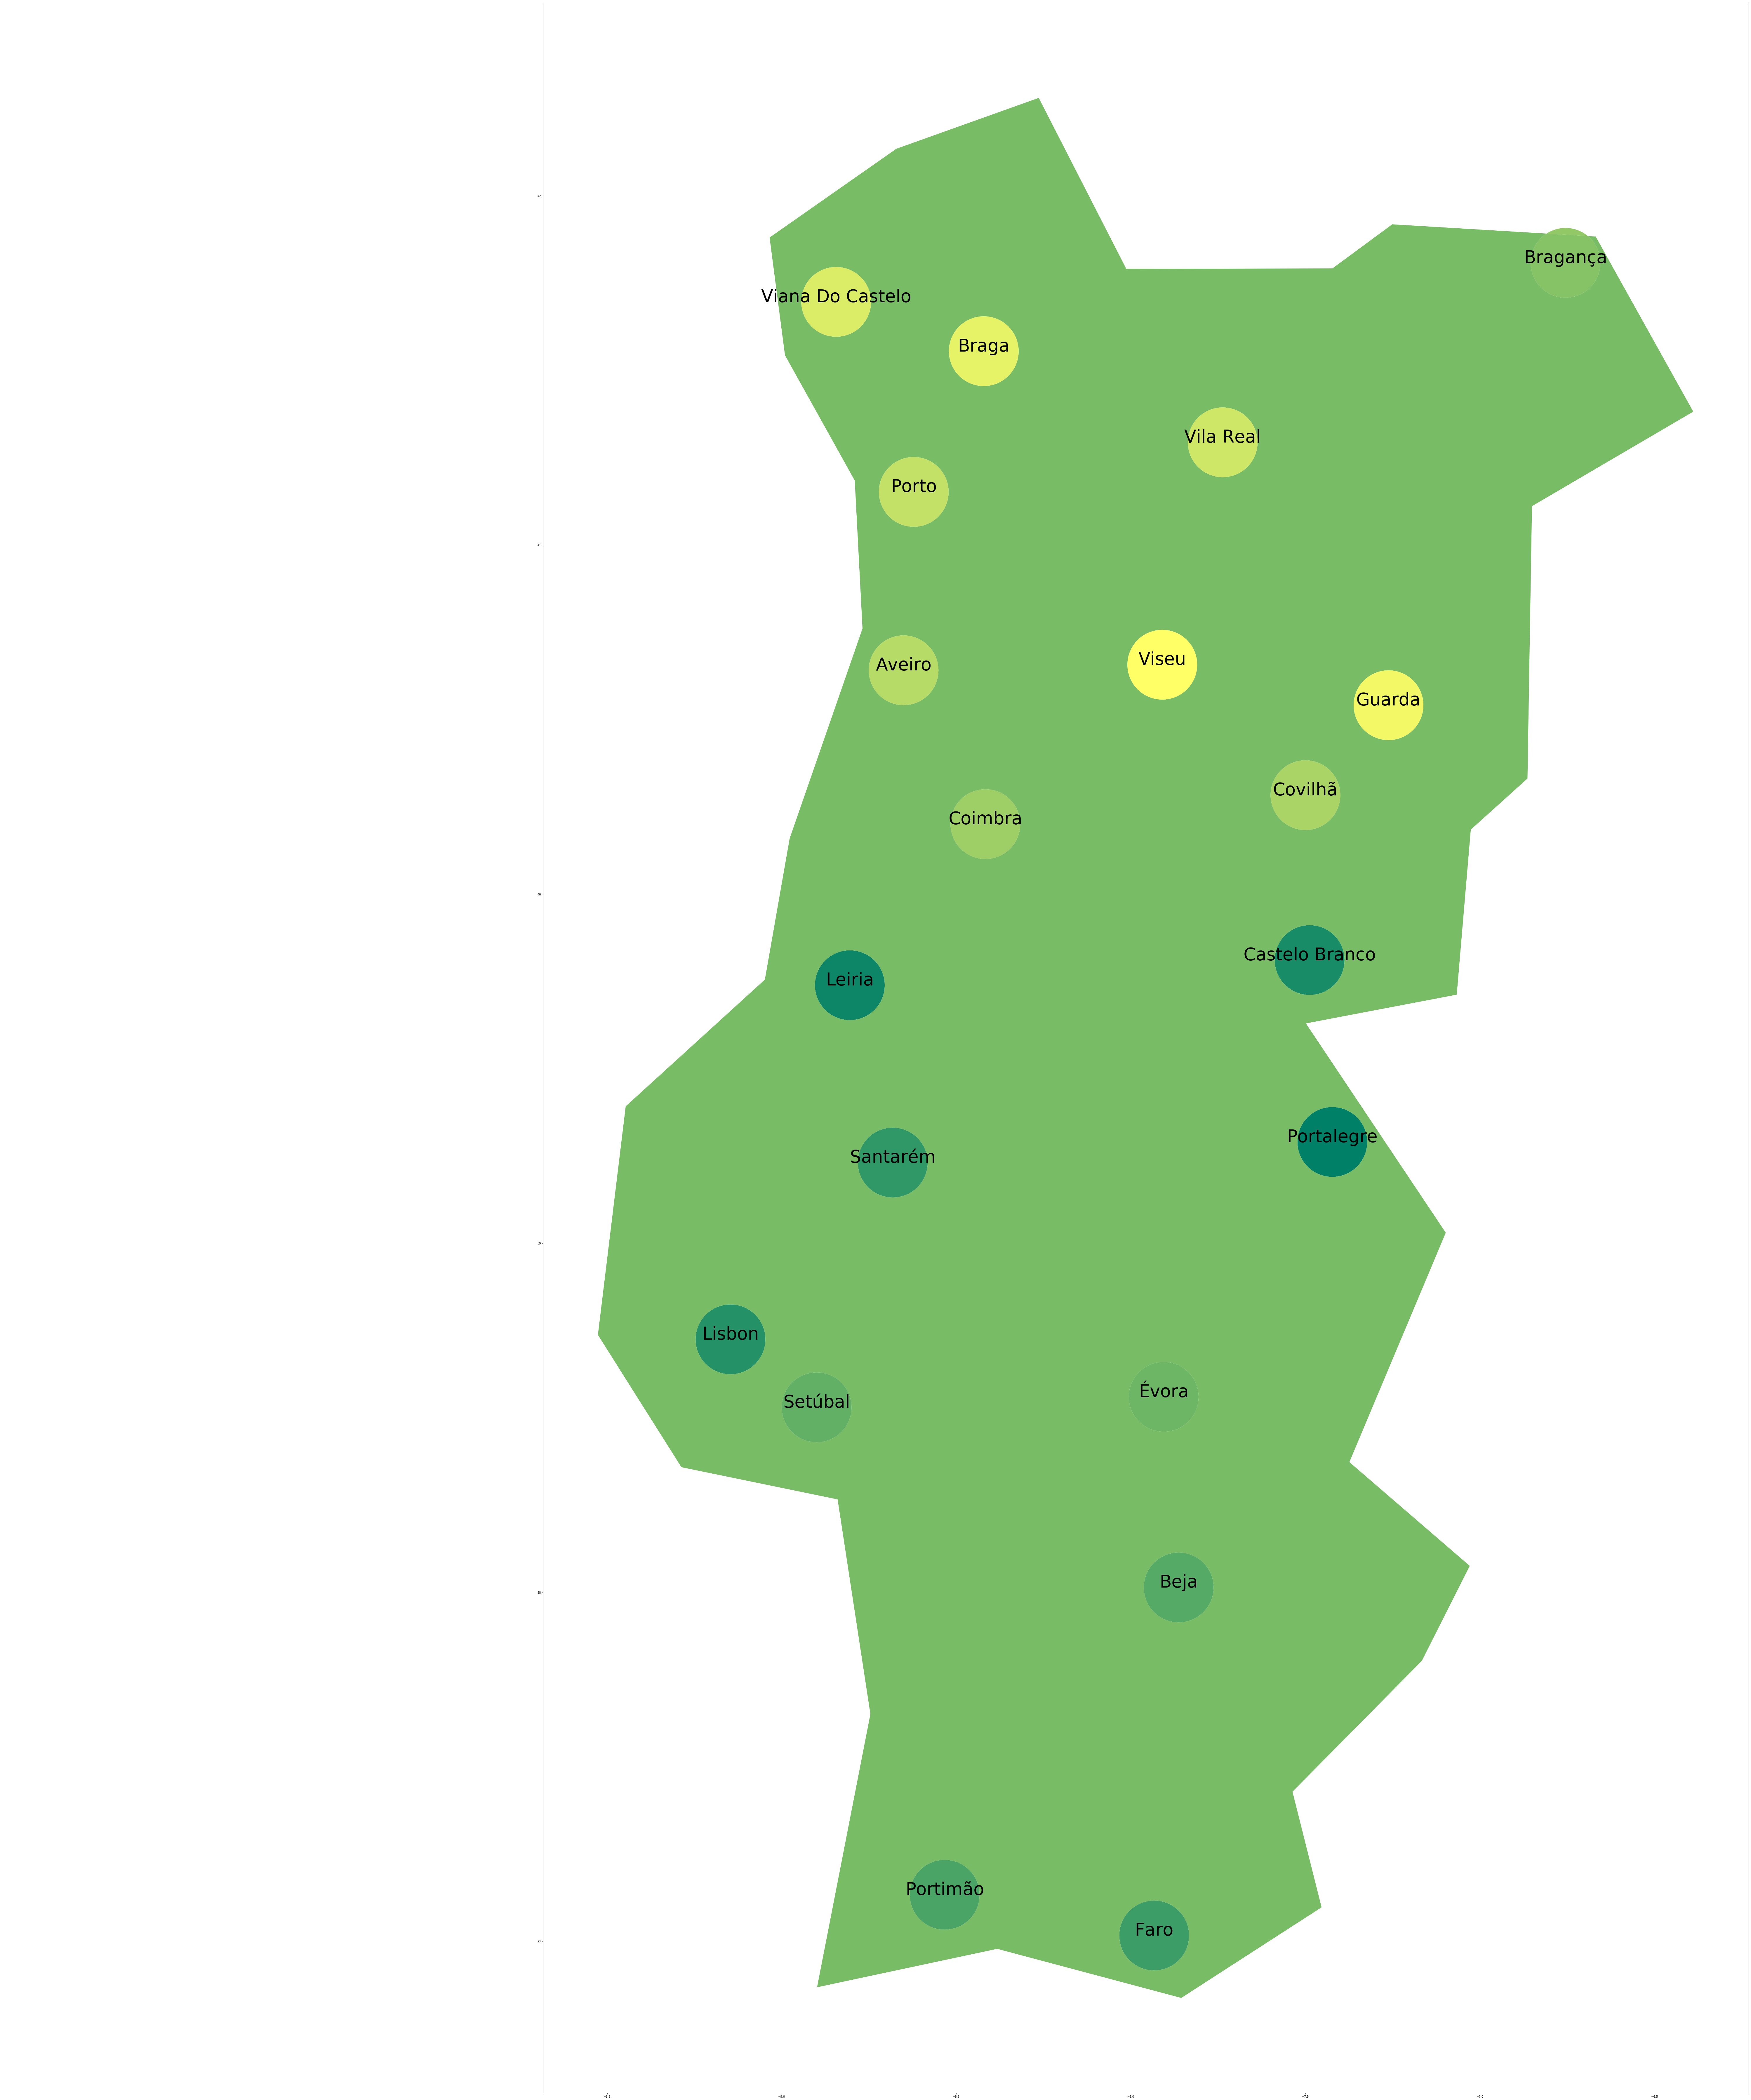

In [202]:
only_within=places_in_portugal[places_in_portugal['within'] == True]
plot_rel(only_within, c[c['NAME'] == 'Portugal'])

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


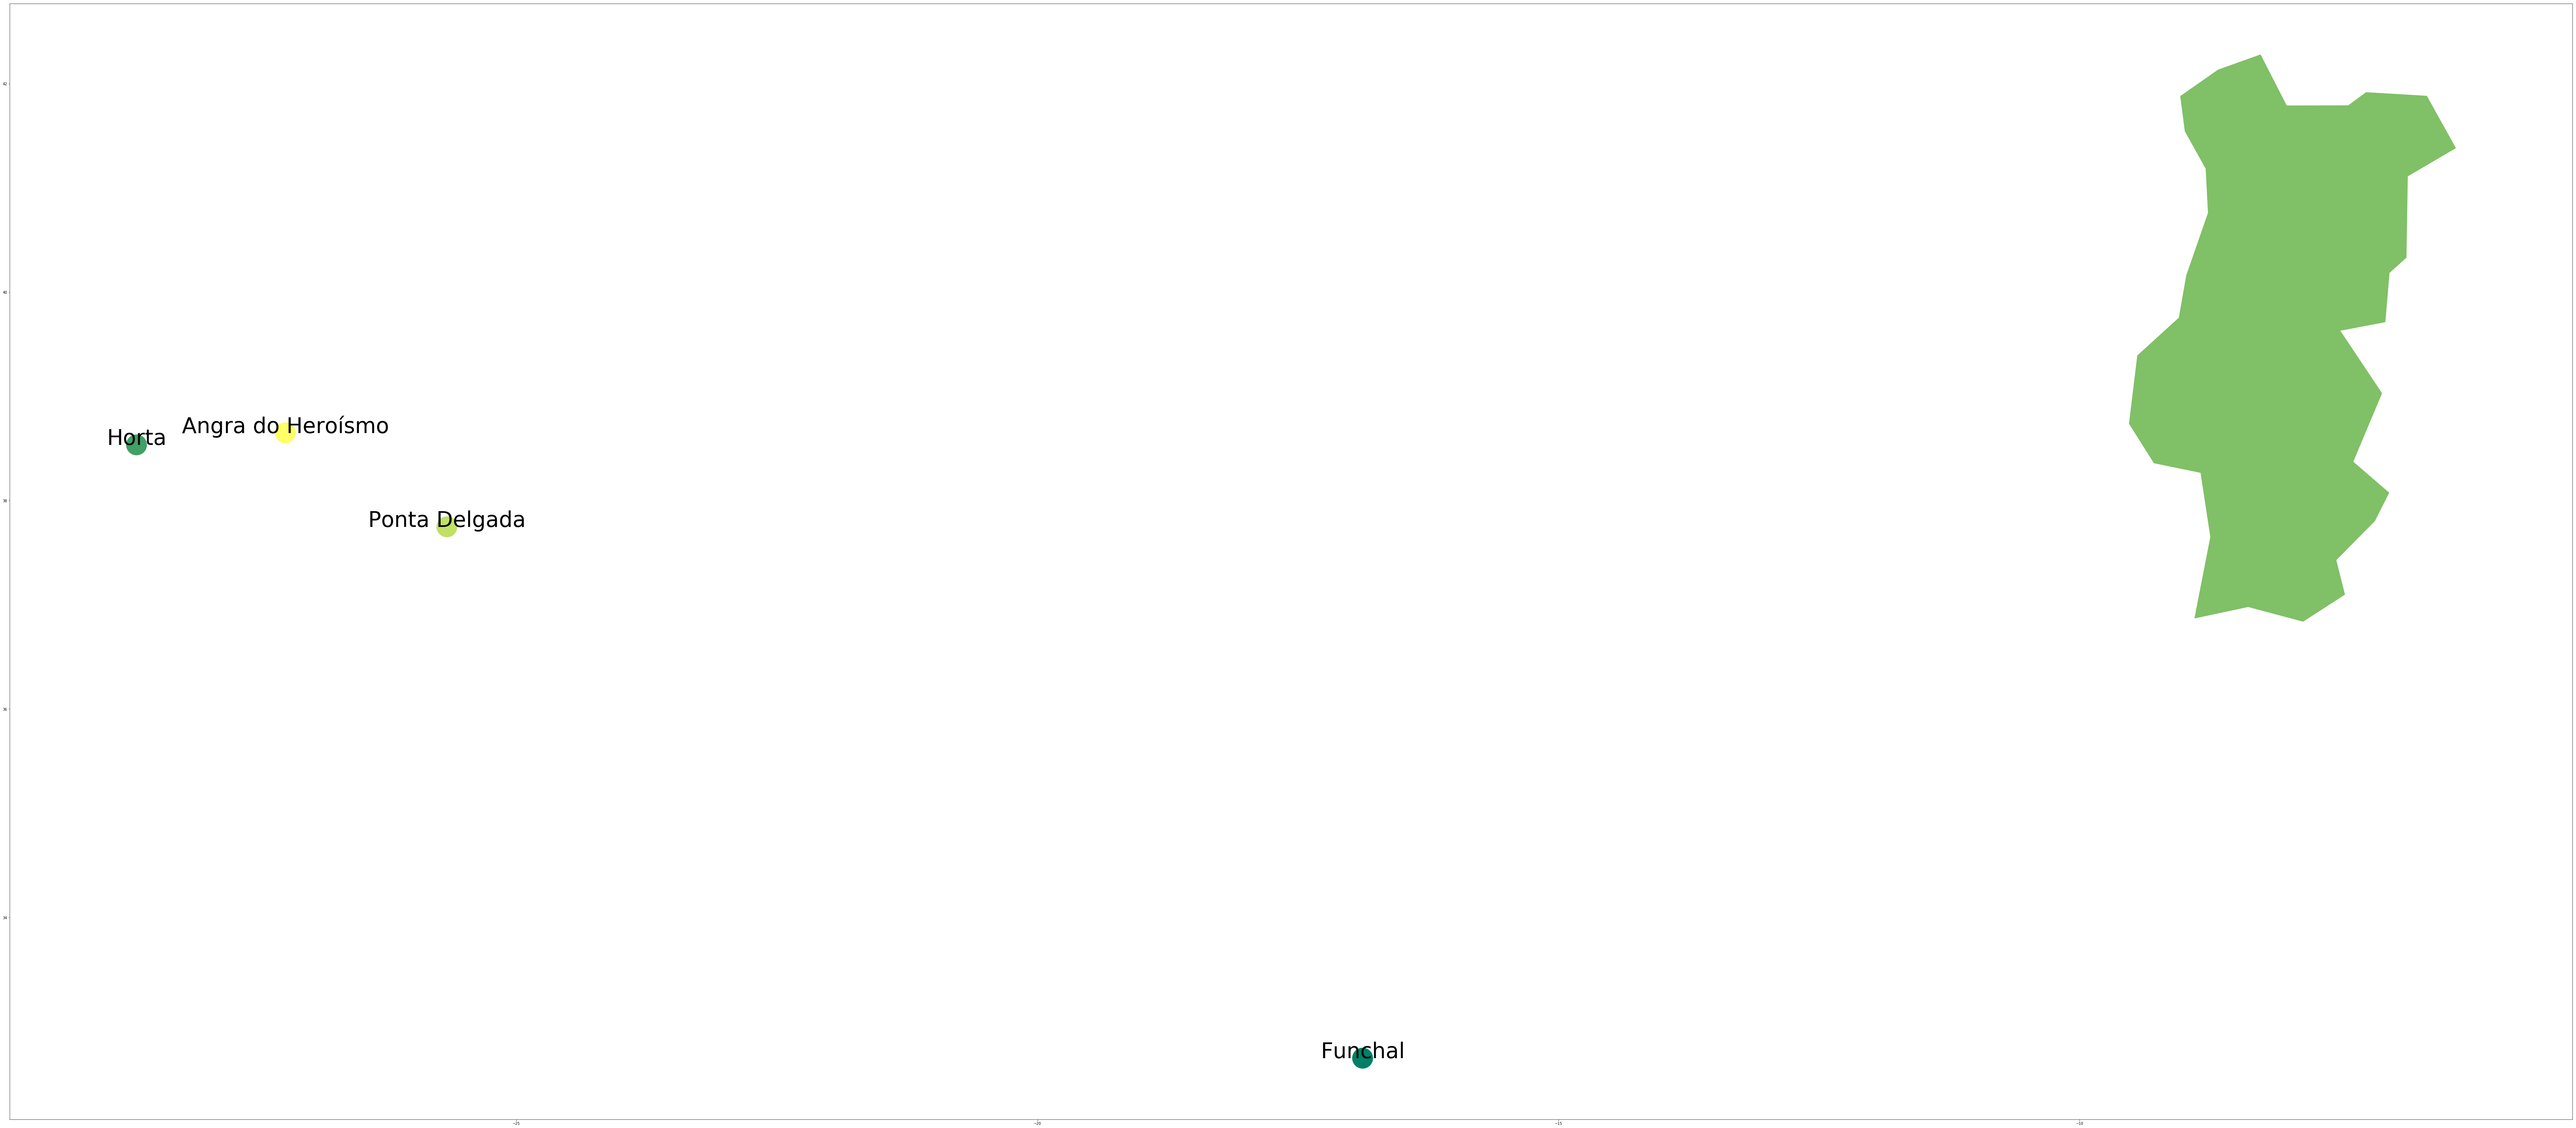

In [212]:
only_without=places_in_portugal[places_in_portugal['within'] == False]
only_without
plot_rel(only_without, c[c['NAME'] == 'Portugal'])